In [1]:
import os
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from utils import *
%matplotlib inline
set_matplotlib_formats('png')
plt.rcParams['figure.figsize']=[10,5]

# CONFIGURATION
set_save_figures(False)
fs=14000

# Parameters used for files
m_values=[32,128,512]
R=1
file_names=['dmr_voice','dmr_data2']

# Input Signal
The input signal in this case is a voice signal 

ValueError: too many values to unpack (expected 2)

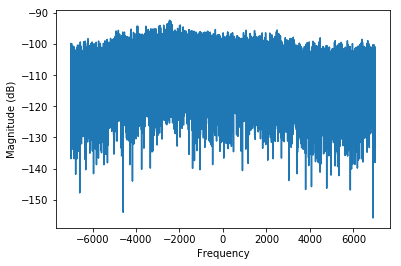

In [26]:
signal = np.fromfile(get_data_file_path('dmr_voice.dat'),dtype=complex);
mag, freqs = plt.magnitude_spectrum(signal,Fs=14000,scale='dB')
plt.ylim((-110, -90))
np.argmax(mag)
# ps = np.abs(np.fft.fft(signal))**2;
# time_step = 1 / 14000;
# freqs = np.fft.fftfreq(signal.size, time_step)
# idx = np.argsort(freqs)
# plt.figure()
# plt.plot(freqs[idx], ps[idx])

Would have saved figure:  /figures/dmr_voice_tc_m=32_r=1_spectral_density.pdf
Would have saved figure:  /figures/dmr_voice_tc_m=128_r=1_spectral_density.pdf
Would have saved figure:  /figures/dmr_voice_tc_m=512_r=1_spectral_density.pdf
Would have saved figure:  /figures/dmr_data2_tc_m=32_r=1_spectral_density.pdf
Would have saved figure:  /figures/dmr_data2_tc_m=128_r=1_spectral_density.pdf
Would have saved figure:  /figures/dmr_data2_tc_m=512_r=1_spectral_density.pdf


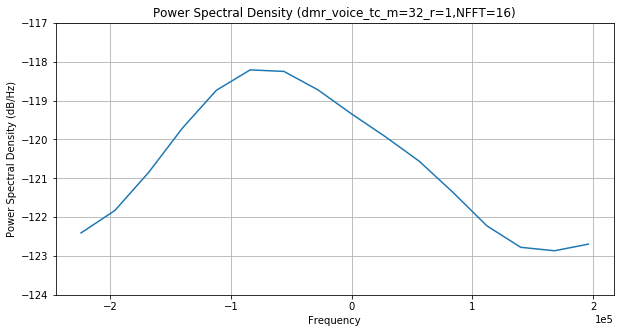

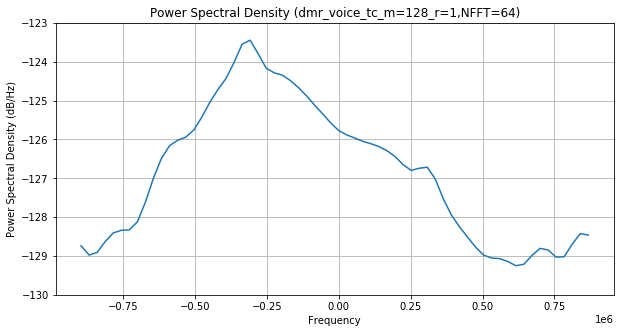

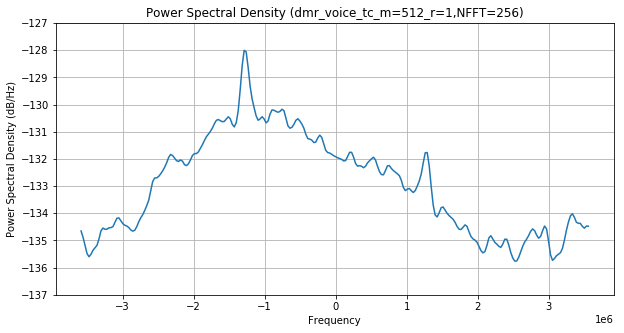

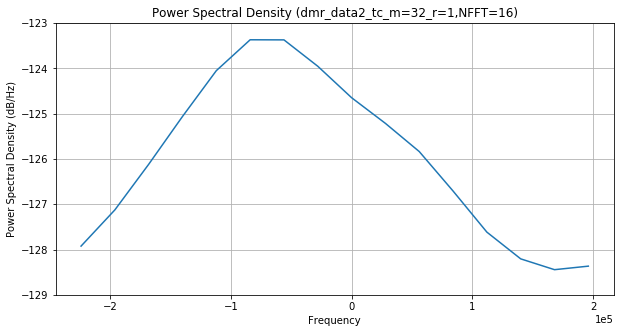

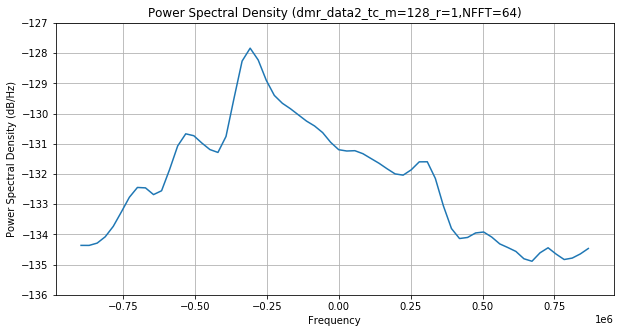

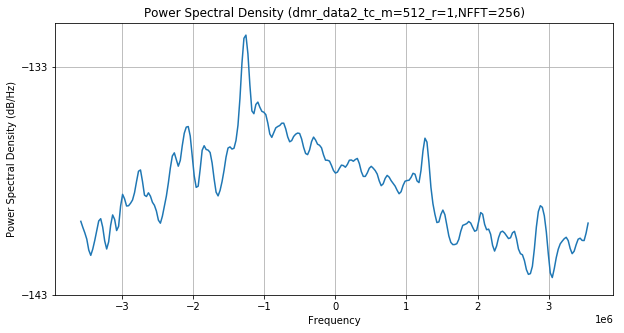

In [9]:
def plot_psd(filename,Fs, NFFT):
    signal=np.fromfile(get_results_file_path(f'{filename}.dat'),dtype=complex);
    plt.figure()
    pxx,freqs=plt.psd(signal,Fs=Fs,NFFT=NFFT,scale_by_freq=True)
    if(get_save_figures() is False):
        plt.title(f'Power Spectral Density ({filename},NFFT={NFFT})')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    save_figure(f'{filename}_spectral_density');

for file_name in file_names:
    for M in m_values:
        base_file_name = f'{file_name}_tc_m={M}_r={R}'
        Fs=fs*M/R
        nfft=M//2
        plot_psd(base_file_name,Fs,nfft)

In [ ]:


for file_name in file_names:
    for M in m_values:
        base_file_name = f'{file_name}_tc_m={M}_r={R}'
        Fs=fs*M/R
        NFFT=M*4
        plot_spectral_density(base_file_name,Fs,NFFT)